In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree , metrics, preprocessing
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Upload file to google drive
# from google.colab import files
# uploaded = files.upload()
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Gender'>

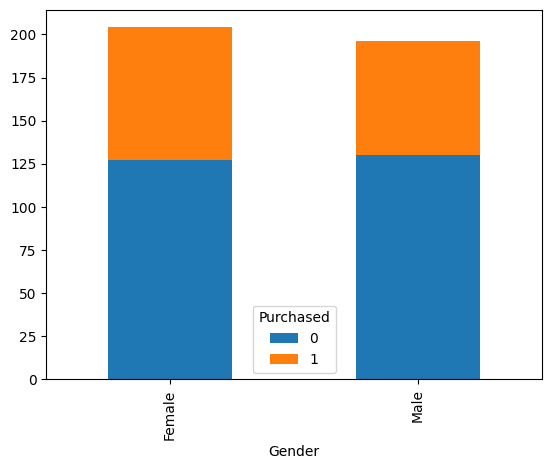

In [7]:
df.groupby(['Gender','Purchased']).size().unstack().plot(kind='bar',stacked=True)

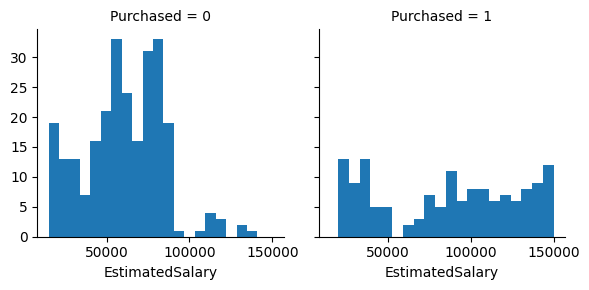

In [8]:
# Purchase by Estimated salary groups
g = sns.FacetGrid(df, col='Purchased')
g.map(plt.hist, 'EstimatedSalary', bins=20)

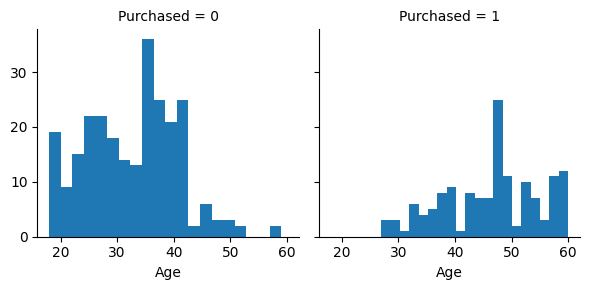

In [9]:
# Purchase by Age groups
g = sns.FacetGrid(df, col='Purchased')
g.map(plt.hist, 'Age', bins=20)

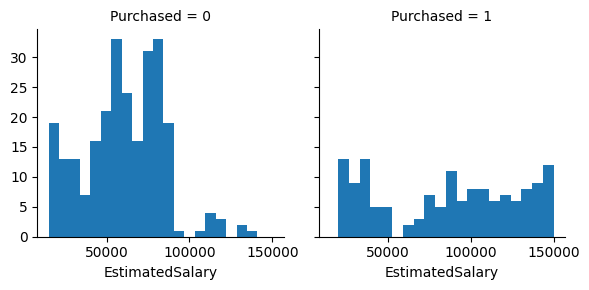

In [10]:
# Purchase by Estimated salary groups
g = sns.FacetGrid(df, col='Purchased')
g.map(plt.hist, 'EstimatedSalary', bins=20)

In [11]:
# Encode Gender column from categorical to numerical values
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
# Getting data ready for Decision Tree modeling
X = df.iloc[:,1:4].values # Features
y = df.iloc[:, 4].values # Label (Purchased 1 or 0)

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# getting the shapes of newly created datasets
print("Shape of x_train : ", X_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (300, 3)
Shape of x_test :  (100, 3)
Shape of y_train :  (300,)
Shape of y_test :  (100,)


In [14]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Fitting classifier to the Training set
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

<Axes: >

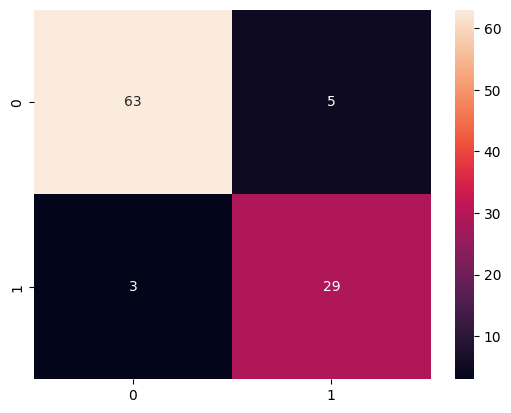

In [17]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#Display the confusion matrix
sns.heatmap(cm, annot = True)

In [18]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [19]:
accuracy_DT=np.round( metrics.accuracy_score(y_test, y_pred),2)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT )
recall_DT=metrics.recall_score(y_test, y_pred )
print('recall :',recall_DT)
precision_DT=metrics.precision_score(y_test, y_pred )
print('Precision :',precision_DT)

Total Accuracy :  92.00
recall : 0.90625
Precision : 0.8529411764705882


In [20]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<Axes: >

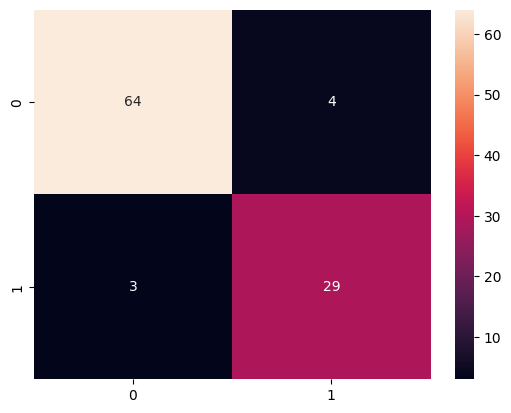

In [22]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#Display the confusion matrix
sns.heatmap(cm, annot = True)

In [23]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# getting the results
print(accuracies.mean())
print(accuracies.std())

0.9
0.061463629715285906


In [24]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [25]:
print(best_parameters)

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


In [26]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1 ,gamma = 0.7)
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.7)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<Axes: >

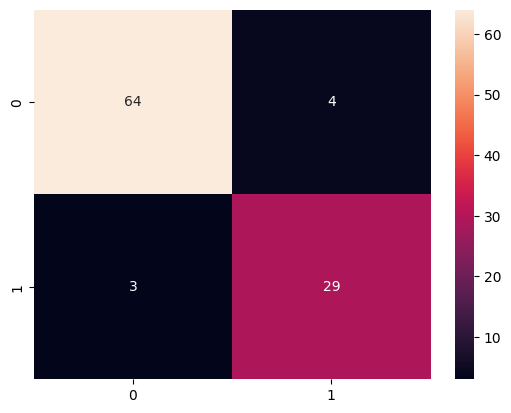

In [28]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)


In [29]:
# making a classification report
cr1 = classification_report(y_test, y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [30]:
accuracy_SVM=np.round( metrics.accuracy_score(y_test, y_pred),2)*100
accuracy_SVM='{:.2f}'.format(accuracy_SVM)
print( 'Total Accuracy : ',accuracy_SVM )
recall_SVM=metrics.recall_score(y_test, y_pred )
print('recall :',recall_SVM)
precision_SVM=metrics.precision_score(y_test, y_pred )
print('Precision :',precision_SVM)

Total Accuracy :  93.00
recall : 0.90625
Precision : 0.8787878787878788


In [31]:
table_DT=pd.DataFrame({"Accuracy":[accuracy_DT,accuracy_SVM],
                       "Recall":[recall_DT,recall_SVM],
                       "Precision ":[precision_DT,precision_SVM]},
                      index=["Decision Tree Classifier","Support Vector Machine"])
table_DT

,Accuracy,Recall,Precision
Decision Tree Classifier,92.00,0.90625,0.852941
Support Vector Machine,93.00,0.90625,0.878788


In [32]:
""" In the above analysis improve our understanding of how social advertising can affect the purchase of product
based on age, gender and estimated salary of a person. We have classified the number of males and females
 who purchased the product through social network advertisements. We observed the number of males are larger
 than females who purchased the product """

' In the above analysis improve our understanding of how social advertising can affect the purchase of product \nbased on age, gender and estimated salary of a person. We have classified the number of males and females\n who purchased the product through social network advertisements. We observed the number of males are larger \n than females who purchased the product '